# Covid 19

This notebooks present the Covid-19 situation in the world and in some countries.
It is inspired by the greatly designed notebook https://www.kaggle.com/corochann/covid-19-current-situation-on-october/notebook

# Imports

In [1]:
import os
import json
import requests
import numpy as np
import pandas as pd
from datetime import datetime
from tqdm.notebook import tqdm

# seaborn
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.core.display import display, HTML

# plotly
from plotly import tools, subplots
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
import plotly.io as pio
pio.templates.default = "plotly_dark"

## Import Data

In [2]:
for dirname, _, filenames in os.walk('../data/CSSEGIS'):
    filenames.sort()
    for filename in filenames:
        print(os.path.join(dirname, filename))

../data/CSSEGIS\time_series_covid19_confirmed_Us.csv
../data/CSSEGIS\time_series_covid19_confirmed_global.csv
../data/CSSEGIS\time_series_covid19_deaths_US.csv
../data/CSSEGIS\time_series_covid19_deaths_global.csv
../data/CSSEGIS\time_series_covid19_recovered_global.csv


In [3]:
#%% time
# Download from Github

for filename in [
    'time_series_covid19_confirmed_global.csv',
    'time_series_covid19_deaths_global.csv',
    'time_series_covid19_recovered_global.csv',
    'time_series_covid19_confirmed_US.csv',
    'time_series_covid19_deaths_US.csv',
]:
    print(f'Downloading {filename}')
    url = f'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/{filename}'
    myfile = requests.get(url)
    name_path = '../data/CSSEGIS/'
    open(''.join([name_path, filename]), 'wb').write(myfile.content)

In [4]:
df_conf_global = pd.read_csv('../data/CSSEGIS/time_series_covid19_confirmed_global.csv')
df_conf_global.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  11/2/20  11/3/20  11/4/20  \
0        0        0        0        0  ...    41633    41728    41814   
1        0        0        0        0  ...    21523    21904    22300   
2        0        0        0        0  ...    58574    58979    59527   
3        0        0        0        0  ...     4888     4910     5045   
4        0        0        0        0  ...    11228    11577    11813   

   11/5/20  11/6/20  11/7/20  11/8/20  11/9/20  11/10/20  11/11/20  
0    41935    41975    42033    42092    42297     42463     42609  
1    22721    23210    23705    24206    24731     25294     25801  
2    60169    60800    61381    62051    62693     63446     64257  
3     5135     5135     5319     5383     5437      5477      5567  
4    12102    12223    12335    12433    12680     12816     12953  

[5 rows x 299 columns]

In [5]:
df_death_global = pd.read_csv('../data/CSSEGIS/time_series_covid19_deaths_global.csv')
df_death_global.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  11/2/20  11/3/20  11/4/20  \
0        0        0        0        0  ...     1541     1544     1548   
1        0        0        0        0  ...      527      532      536   
2        0        0        0        0  ...     1980     1980     1999   
3        0        0        0        0  ...       75       75       75   
4        0        0        0        0  ...      289      291      296   

   11/5/20  11/6/20  11/7/20  11/8/20  11/9/20  11/10/20  11/11/20  
0     1554     1554     1556     1558     1574      1577      1581  
1      543      549      557      559      571       579       590  
2     2011     2024     2036     2048     2062      2077      2093  
3       75       75       75       75       75        75        75  
4      299      300      303      307      308       308       312  

[5 rows x 299 columns]

In [6]:
df_recov_global = pd.read_csv('../data/CSSEGIS/time_series_covid19_recovered_global.csv')
df_recov_global.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  11/2/20  11/3/20  11/4/20  \
0        0        0        0        0  ...    34342    34355    34362   
1        0        0        0        0  ...    11367    11473    11578   
2        0        0        0        0  ...    40577    40577    41001   
3        0        0        0        0  ...     3548     3627     3734   
4        0        0        0        0  ...     5172     5230     5266   

   11/5/20  11/6/20  11/7/20  11/8/20  11/9/20  11/10/20  11/11/20  
0    34440    34440    34446    34458    34721     34954     34967  
1    11696    11861    12002    12092    12203     12353     12493  
2    41244    41510    41783    42037    42325     42626     42980  
3     3858     3858     4043     4248     4332      4405      4488  
4     5350     5626     5647     5899     5927      6036      6125  

[5 rows x 299 columns]

# External Data

In [7]:
with open('../data/external/countries.geojson.txt') as f:
    geojson_countries = json.load(f)

# Prepare Data

In [8]:
def _convert_date_str(df: pd.DataFrame):
    """
    """
    try:
        df.columns = list(df.columns[:4]) + [datetime.strptime(d, "%m/%d/%y").date().strftime("%Y-%m-%d") for d in df.columns[4:]]
    except:
        print('_convert_date_str failed with %y, try %Y')
        df.columns = list(df.columns[:4]) + [datetime.strptime(d, "%m/%d/%Y").date().strftime("%Y-%m-%d") for d in df.columns[4:]]

def _rename_columns(df: pd.DataFrame):
    """
    """
    df.rename(columns={'Province/State': 'Province_State', 'Country/Region': 'Country_Region'}, inplace=True)

def remove_states(df: pd.DataFrame):
    """
    """
    removed_states = "Recovered|Grand Princess|Diamond Princess"
    return df[~df['Province_State'].replace(np.nan, "nan").str.match(removed_states)]

def remove_countries(df: pd.DataFrame):
    """
    """
    removed_countries = "US|The West Bank and Gaza"
    return df[~df['Country_Region'].replace(np.nan, 'nan').str.match(removed_countries)]

def melt_date(df: pd.DataFrame, value_name: str):
    """
    """
    return df.melt(id_vars=['Country_Region', 'Province_State', 'Lat', 'Long'], value_vars=df.columns[4:],
        var_name='Date', value_name=value_name)

def create_train(df_conf: pd.DataFrame, df_death: pd.DataFrame, df_recov: pd.DataFrame):
    """
    """
    train = df_conf.merge(df_death, on=['Country_Region', 'Province_State', 'Lat', 'Long', 'Date'])
    return train.merge(df_recov, on=['Country_Region', 'Province_State', 'Lat', 'Long', 'Date'])

def merge_canada(df_canada: pd.DataFrame, name_col_sum: str):
    """
    """
    return df_canada.groupby(['Date', 'Country_Region'])[[name_col_sum]].sum().reset_index()

def create_train_canada(df_conf: pd.DataFrame, df_death: pd.DataFrame, df_recov: pd.DataFrame):
    """
    """
    train_can = df_conf.merge(df_death, on=['Country_Region', 'Date'])
    return train_can.merge(df_recov, on=['Country_Region', 'Date'])

## World

In [9]:
_convert_date_str(df_conf_global)
_convert_date_str(df_death_global)
_convert_date_str(df_recov_global)

In [10]:
df_conf_global.head()

Province/State Country/Region       Lat       Long  2020-01-22  2020-01-23  \
0            NaN    Afghanistan  33.93911  67.709953           0           0   
1            NaN        Albania  41.15330  20.168300           0           0   
2            NaN        Algeria  28.03390   1.659600           0           0   
3            NaN        Andorra  42.50630   1.521800           0           0   
4            NaN         Angola -11.20270  17.873900           0           0   

   2020-01-24  2020-01-25  2020-01-26  2020-01-27  ...  2020-11-02  \
0           0           0           0           0  ...       41633   
1           0           0           0           0  ...       21523   
2           0           0           0           0  ...       58574   
3           0           0           0           0  ...        4888   
4           0           0           0           0  ...       11228   

   2020-11-03  2020-11-04  2020-11-05  2020-11-06  2020-11-07  2020-11-08  \
0       41728       41814       41935       41975       42033       42092   
1       21904       22300       22721       23210       23705       24206   
2       58979       59527       60169       60800       61381       62051   
3        4910        5045        5135        5135        5319        5383   
4       11577       11813       12102       12223       12335       12433   

   2020-11-09  2020-11-10  2020-11-11  
0       42297       42463       42609  
1       24731       25294       25801  
2       62693       63446       64257  
3        5437        5477        5567  
4       12680       12816       12953  

[5 rows x 299 columns]

In [11]:
_rename_columns(df_conf_global)
_rename_columns(df_death_global)
_rename_columns(df_recov_global)

In [12]:
df_conf_global = remove_states(df_conf_global)
df_death_global = remove_states(df_death_global)
df_recov_global = remove_states(df_recov_global)

In [13]:
df_conf_global = remove_countries(df_conf_global)
df_death_global = remove_countries(df_death_global)
df_recov_global = remove_countries(df_recov_global)

In [14]:
df_conf_global_melt = melt_date(df_conf_global, 'ConfirmedCases')
df_death_global_melt = melt_date(df_death_global, 'Deaths')
df_recov_global_melt = melt_date(df_recov_global, 'Recovered')

In [15]:
df_conf_global_melt.head(3)

Country_Region Province_State       Lat       Long        Date  \
0    Afghanistan            NaN  33.93911  67.709953  2020-01-22   
1        Albania            NaN  41.15330  20.168300  2020-01-22   
2        Algeria            NaN  28.03390   1.659600  2020-01-22   

   ConfirmedCases  
0               0  
1               0  
2               0

In [16]:
df_death_global_melt.head(3)

Country_Region Province_State       Lat       Long        Date  Deaths
0    Afghanistan            NaN  33.93911  67.709953  2020-01-22       0
1        Albania            NaN  41.15330  20.168300  2020-01-22       0
2        Algeria            NaN  28.03390   1.659600  2020-01-22       0

In [17]:
df_recov_global_melt.head(3)

Country_Region Province_State       Lat       Long        Date  Recovered
0    Afghanistan            NaN  33.93911  67.709953  2020-01-22          0
1        Albania            NaN  41.15330  20.168300  2020-01-22          0
2        Algeria            NaN  28.03390   1.659600  2020-01-22          0

In [18]:
train = create_train(df_conf_global_melt, df_death_global_melt, df_recov_global_melt)
df_conf_global_melt_can = df_conf_global_melt[df_conf_global_melt['Country_Region'] == 'Canada']
df_conf_global_melt_can = merge_canada(df_conf_global_melt_can, 'ConfirmedCases')
df_death_global_melt_can = df_death_global_melt[df_death_global_melt['Country_Region'] == 'Canada']
df_death_global_melt_can = merge_canada(df_death_global_melt_can, 'Deaths')
df_recov_global_melt_can = df_recov_global_melt[df_recov_global_melt['Country_Region'] == 'Canada']
train_can = create_train_canada(df_conf_global_melt_can, df_death_global_melt_can, df_recov_global_melt_can)
train = pd.concat([train, train_can], ignore_index=True)

## US

In [19]:
df_conf_us = pd.read_csv('../data/CSSEGIS/time_series_covid19_confirmed_Us.csv')
df_death_us = pd.read_csv('../data/CSSEGIS/time_series_covid19_deaths_US.csv')

In [20]:
def _drop_columns(df: pd.DataFrame, drop_pop: bool=False):
    """
    """
    df.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Combined_Key'], inplace=True, axis=1)
    if drop_pop:
        df.drop(['Population'], inplace=True, axis=1)

def _rename_long(df: pd.DataFrame):
    """
    """
    df.rename({'Long_': 'Long'}, axis=1, inplace=True)

def clean_df_us(df: pd.DataFrame):
    """
    """
    return df[~df.Province_State.str.match("Diamond Princess|Grand Princess|Recovered|Northern Mariana Islands|American Samoa")]

def agg_by_province(df: pd.DataFrame):
    """
    """
    return df.groupby(['Country_Region', 'Province_State']).sum().reset_index()

def _remove_lat_long(df: pd.DataFrame):
    """
    """
    df.drop(['Lat', 'Long'], inplace=True, axis=1)

def melt_date_us(df: pd.DataFrame, val_name: str):
    """
    """
    return df.melt(id_vars=['Country_Region', 'Province_State'], value_vars=df.columns[2:],
        var_name='Date', value_name=val_name)

def create_train_us(df_conf: pd.DataFrame, df_death: pd.DataFrame):
    """
    """
    return df_conf.merge(df_death, on=['Country_Region', 'Province_State', 'Date'])

In [21]:
_drop_columns(df_conf_us, drop_pop=False)
_drop_columns(df_death_us, drop_pop=True)

In [22]:
_rename_long(df_conf_us)
_rename_long(df_death_us)

In [23]:
_convert_date_str(df_conf_us)
_convert_date_str(df_death_us)

In [24]:
df_conf_us = clean_df_us(df_conf_us)
df_death_us = clean_df_us(df_death_us)

In [25]:
df_conf_us = agg_by_province(df_conf_us)
df_death_us = agg_by_province(df_death_us)

In [26]:
_remove_lat_long(df_conf_us)
_remove_lat_long(df_death_us)

In [27]:
df_conf_us = melt_date_us(df_conf_us, val_name='ConfirmedCases')
df_death_us = melt_date_us(df_death_us, val_name='Deaths')

In [28]:
df_conf_us

Country_Region Province_State        Date  ConfirmedCases
0                 US        Alabama  2020-01-22               0
1                 US         Alaska  2020-01-22               0
2                 US        Arizona  2020-01-22               0
3                 US       Arkansas  2020-01-22               0
4                 US     California  2020-01-22               0
...              ...            ...         ...             ...
15925             US       Virginia  2020-11-11          196506
15926             US     Washington  2020-11-11          120011
15927             US  West Virginia  2020-11-11           30201
15928             US      Wisconsin  2020-11-11          301349
15929             US        Wyoming  2020-11-11           19374

[15930 rows x 4 columns]

In [29]:
train_us = create_train_us(df_conf_us, df_death_us)

# Aggregate all

In [30]:
# Functions

def _rename_train_col(train: pd.DataFrame, id_recov: bool=False):
    """
    """
    train.rename({'Country_Region': 'country', 'Province_State': 'province', 'Date': 'date',
        'ConfirmedCases': 'confirmed', 'Deaths': 'fatalities'}, axis=1, inplace=True)
    if id_recov:
        train.rename({'Id': 'id', 'Recovered': 'recovered'}, axis=1, inplace=True)

def update_country(train: pd.DataFrame):
    """
    """
    train['country_province'] = train['country'].fillna('') + '/' + train['province'].fillna('')
    return train

In [31]:
train = pd.concat([train, train_us], axis=0, sort=False)
_rename_train_col(train_us, id_recov=False)
train_us = update_country(train_us)

In [32]:
_rename_train_col(train, id_recov=True)
train = update_country(train)

# Worldwide trend

In [33]:
# Function

def create_ww_df(df: pd.DataFrame):
    """
    """
    df_ww = df.groupby('date')[['confirmed', 'fatalities']].sum().reset_index()
    df_ww['new_case'] = df_ww['confirmed'] - df_ww['confirmed'].shift(1)
    df_ww['growth_factor'] = df_ww['new_case'] / df_ww['new_case'].shift(1)
    return df_ww

def create_ww_melt(df: pd.DataFrame):
    """
    """
    return pd.melt(df, id_vars=['date'], value_vars=['confirmed', 'fatalities', 'new_case'])

def calc_mortality(df: pd.DataFrame):
    """
    """
    df['mortality'] = df['fatalities'] / df['confirmed']
    return df

In [34]:
df_ww = create_ww_df(train)
df_ww.head()

date  confirmed  fatalities  new_case  growth_factor
0  2020-01-22        549          17       NaN            NaN
1  2020-01-23        648          17      99.0            NaN
2  2020-01-24        930          25     282.0       2.848485
3  2020-01-25       1394          41     464.0       1.645390
4  2020-01-26       2022          54     628.0       1.353448

In [35]:
df_ww_melt = create_ww_melt(df_ww)

In [36]:
df_ww_melt

date   variable     value
0    2020-01-22  confirmed     549.0
1    2020-01-23  confirmed     648.0
2    2020-01-24  confirmed     930.0
3    2020-01-25  confirmed    1394.0
4    2020-01-26  confirmed    2022.0
..          ...        ...       ...
880  2020-11-07   new_case  511437.0
881  2020-11-08   new_case  564561.0
882  2020-11-09   new_case  500520.0
883  2020-11-10   new_case  536940.0
884  2020-11-11   new_case  665885.0

[885 rows x 3 columns]

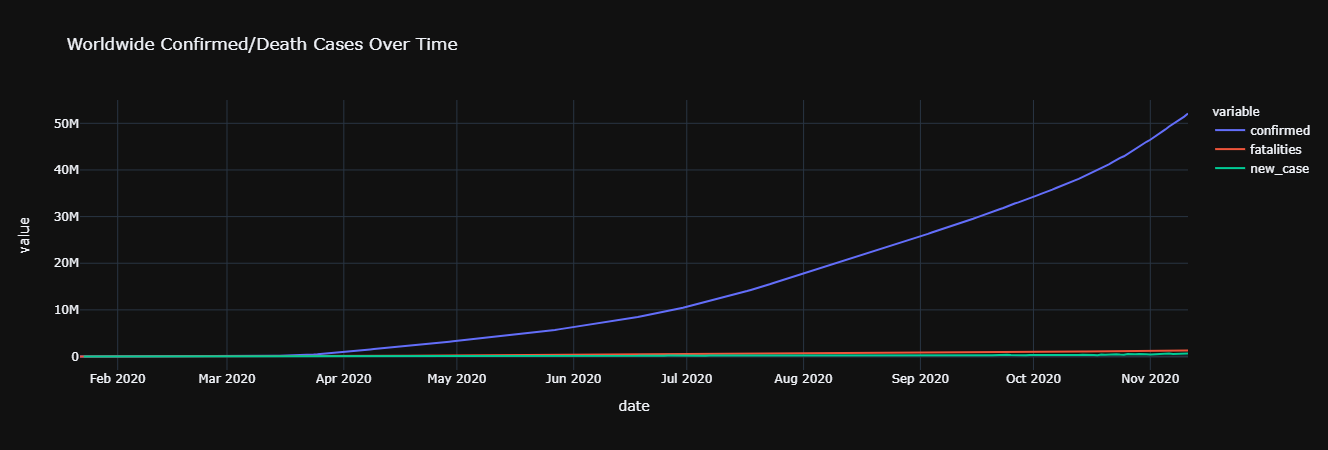

In [37]:
fig = px.line(df_ww_melt, x='date', y='value', color='variable',
   title='Worldwide Confirmed/Death Cases Over Time')
fig.show()
# fig, ax = plt.subplots(figsize=(18, 9))
# sns.lineplot(x='date', y='value', hue='variable',
#     ax=ax,
#     data=df_ww_melt)
# plt.title('Worldwide Confirmed/Death Cases Over Time',)

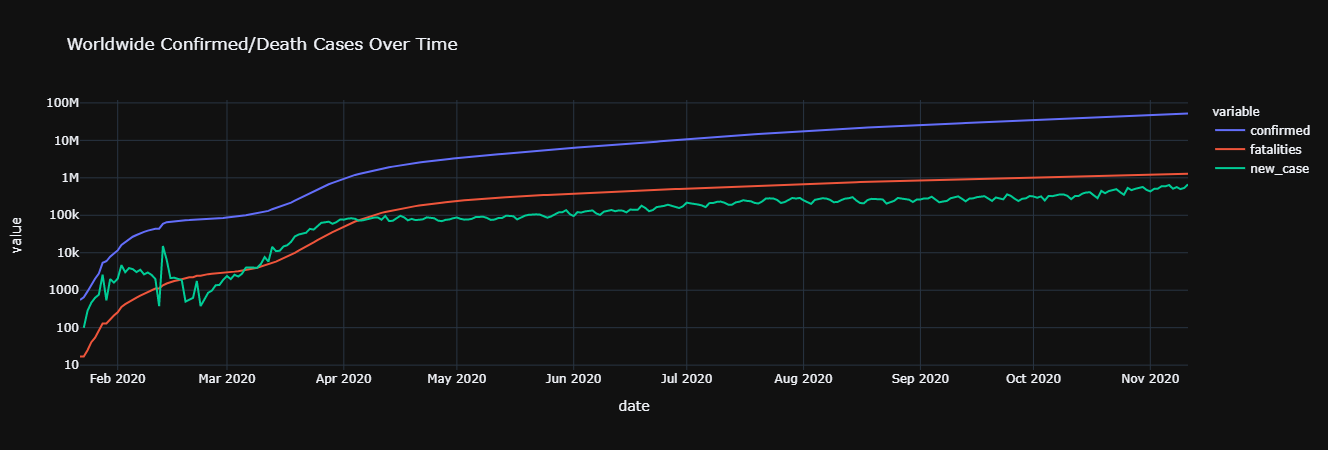

In [38]:
fig = px.line(df_ww_melt, x='date', y='value', color='variable',
    title='Worldwide Confirmed/Death Cases Over Time',
    log_y=True,
)
fig.show()

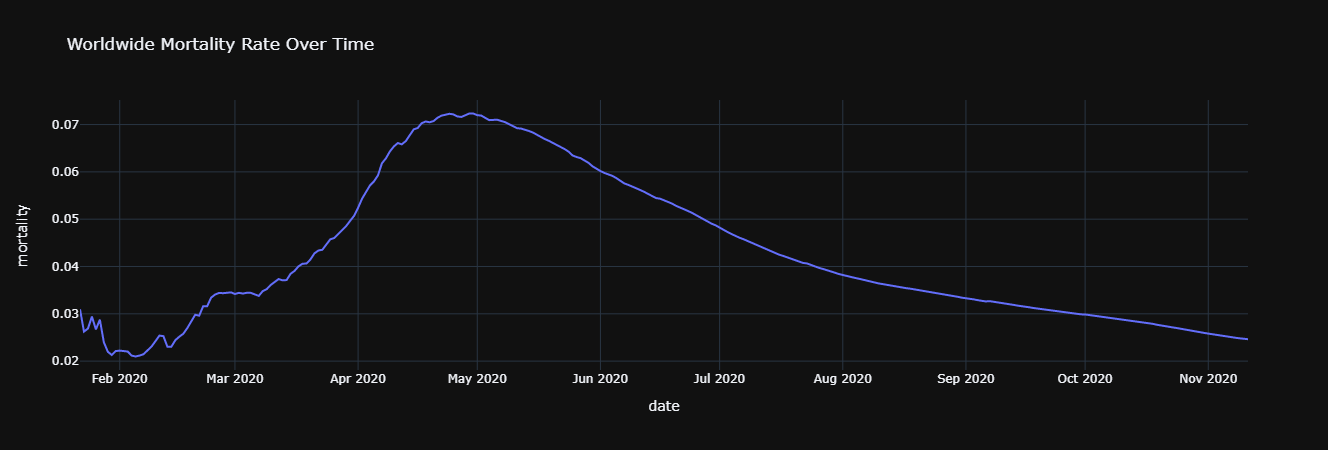

In [39]:
df_ww = calc_mortality(df_ww)
fig = px.line(df_ww, x='date', y='mortality',
   title='Worldwide Mortality Rate Over Time')
fig.show()

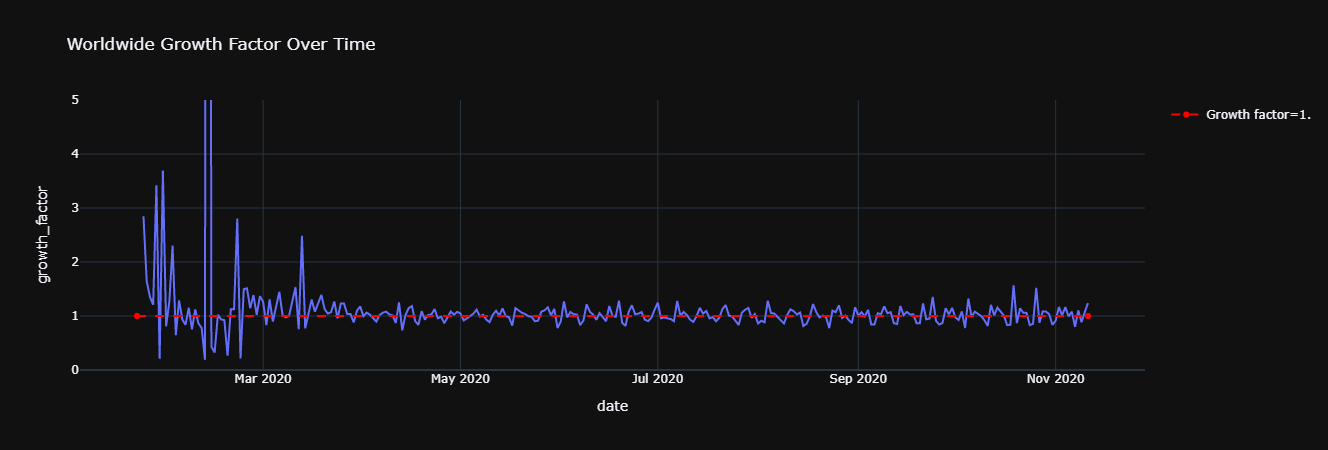

In [40]:
fig = px.line(df_ww, x="date", y="growth_factor", 
    title="Worldwide Growth Factor Over Time")
fig.add_trace(go.Scatter(x=[df_ww['date'].min(), df_ww['date'].max()], y=[1., 1.], name='Growth factor=1.', line=dict(dash='dash', color=('rgb(255, 0, 0)'))))
fig.update_yaxes(range=[0., 5.])
fig.show()

# By country

In [41]:
# Functions
def agg_country(df: pd.DataFrame):
    """
    """
    return df.groupby(['date', 'country'])[['confirmed', 'fatalities']].sum().reset_index()

def create_top_countries(df: pd.DataFrame):
    """
    """
    return df.query('(date == @target_date) & (confirmed > 1000)').sort_values('confirmed', ascending=False)

def melt_top_country(df: pd.DataFrame):
    """
    """
    return pd.melt(df, id_vars='country', value_vars=['confirmed', 'fatalities'])

def get_topk_countries_conf(df: pd.DataFrame, k: int=20):
    """
    """
    top_countries = df.query('confirmed > 1000').sort_values('confirmed', ascending=False)
    top_countries = pd.melt(top_countries, id_vars=['country', 'date'], value_vars=['confirmed', 'fatalities'])
    topk_countries = df.sort_values('confirmed', ascending=False)['country'].unique()[:k]
    return topk_countries, df[df['country'].isin(topk_countries)].sort_values('confirmed', ascending=False).reset_index()

def get_topk_countries_fat(df: pd.DataFrame, k: int=20):
    """
    """
    top_countries = df.query('confirmed > 1000').sort_values('confirmed', ascending=False)
    top_countries = pd.melt(top_countries, id_vars=['country', 'date'], value_vars=['confirmed', 'fatalities'])
    topk_countries = df.sort_values('fatalities', ascending=False)['country'].unique()[:k]
    return topk_countries, df[df['country'].isin(topk_countries)].sort_values('fatalities', ascending=False).reset_index()

def create_mortality_rate_top(df: pd.DataFrame):
    """
    """
    top_country = df.query('(date == @target_date) & (confirmed > 100)')
    top_country['mortality_rate'] = top_country['fatalities'] / top_country['confirmed']
    return top_country.sort_values('mortality_rate', ascending=False)

def create_map_df(df: pd.DataFrame):
    """
    """
    df_all_country = df.query('date == @target_date')
    df_all_country['confirmed_log1p'] = np.log10(df_all_country['confirmed'] + 1)
    df_all_country['fatalities_log1p'] = np.log10(df_all_country['fatalities'] + 1)
    df_all_country['mortality_rate'] = df_all_country['fatalities'] / df_all_country['confirmed']
    return df_all_country

In [42]:
df_country = agg_country(train)

In [43]:
countries = df_country['country'].unique()
print(f'{len(countries)} countries are in dataset:\n{countries}')

188 countries are in dataset:
['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burma' 'Burundi'
 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic'
 'Chad' 'Chile' 'China' 'Colombia' 'Comoros' 'Congo (Brazzaville)'
 'Congo (Kinshasa)' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' 'Denmark' 'Diamond Princess' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji' 'Finland' 'France'
 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Holy See'
 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq'
 'Ireland' 'Israel'

In [44]:
target_date = df_country['date'].max()

print('Date: ', target_date)
for i in [1, 10, 100, 1000, 10000]:
    n_countries = len(df_country.query('(date == @target_date) & confirmed > @i'))
    print(f'{n_countries} countries have more than {i} confirmed cases')

Date:  2020-11-11
186 countries have more than 1 confirmed cases
184 countries have more than 10 confirmed cases
176 countries have more than 100 confirmed cases
157 countries have more than 1000 confirmed cases
111 countries have more than 10000 confirmed cases


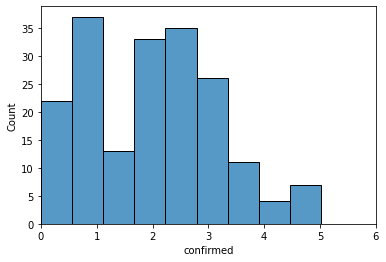

In [45]:
ax = sns.histplot(np.log10(df_country.query('date == "2020-03-27"')['confirmed'] + 1))
ax.set_xlim([0, 6])
ax.set_xticks(np.arange(7))
#_ = ax.set_xticklabels(['0', '10', '100', '1k', '10k', '100k'])

In [46]:
df_top_country = create_top_countries(df_country)
df_top_country_melt = melt_top_country(df_top_country)

In [47]:
df_top_country_melt.head()

country   variable     value
0      US  confirmed  10399073
1   India  confirmed   8683916
2  Brazil  confirmed   5747660
3  France  confirmed   1914918
4  Russia  confirmed   1822345

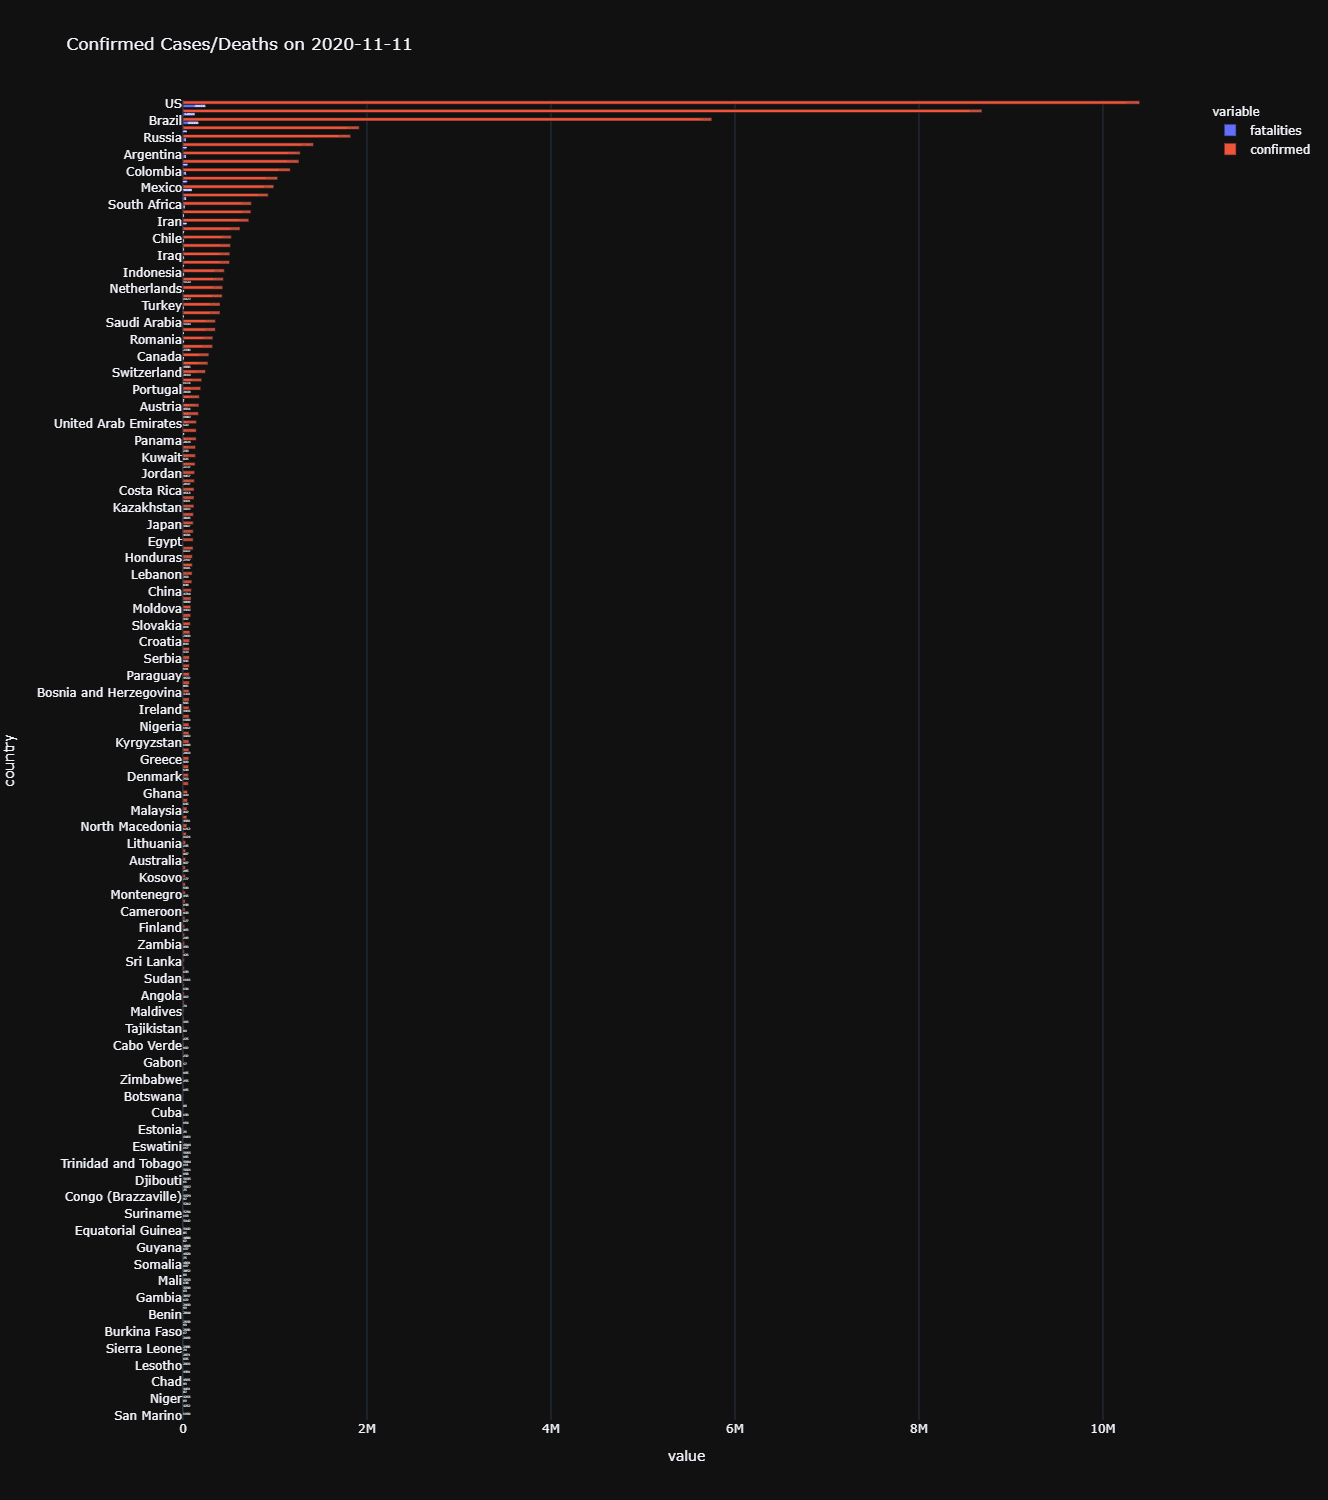

In [48]:
fig = px.bar(df_top_country_melt.iloc[::-1],
    x='value', y='country', color='variable', barmode='group',
    title=f'Confirmed Cases/Deaths on {target_date}', text='value', height=1500, orientation='h')
fig.show()

In [49]:
top20_countries, df_top20_countries_conf = get_topk_countries_conf(df_country, k=20)

ValueError: too many values to unpack (expected 2)

In [ ]:
fig = px.line(df_top20_countries_conf,
    x='date', y='confirmed', color='country',
    title=f'Confirmed Cases for top 20 country as of {target_date}',
    height=800)
fig.show()

In [ ]:
_, df_top20_countries_fat = get_topk_countries_fat(df_country, k=20)

In [ ]:
fig = px.line(df_top20_countries_fat,
    x='date', y='fatalities', color='country',
    title=f'Fatalities for top 20 country as of {target_date}',
    height=800)
fig.show()

In [ ]:
df_top_country = create_mortality_rate_top(df_country)
fig = px.bar(df_top_country[:30].iloc[::-1],
    x='mortality_rate', y='country',
    title=f'Mortality rate HIGH: top 30 countries on {target_date}',
    text='mortality_rate', height=800, orientation='h')
fig.show()

In [ ]:
fig = px.bar(df_top_country[-30:].iloc[::-1],
    x='mortality_rate', y='country',
    title=f'Mortality rate LOW: top 30 countries on {target_date}',
    text='mortality_rate', height=800, orientation='h')
fig.show()

# World Map

In [ ]:
df_all_country = create_map_df(df_country)

In [ ]:
country_names = {'country': {
    'Czechia': 'Czech Republic',
    'Korea, South': 'South Korea',
    'Serbia': 'Republic of Serbia',
    'Taiwan*': 'Taiwan',
    'US': 'United States of America',
}}
df_all_country.replace(country_names, inplace=True)

In [ ]:
token = 'pk.eyJ1IjoiYndhbGx5biIsImEiOiJja2RvYzJqdXYxcXdxMnlsY3F5Z25jNzRpIn0.s6FZq5p4Mi3sQiL5FFo5UA'
fig = go.Figure(go.Choroplethmapbox(
    geojson=geojson_countries, locations=df_all_country['country'], 
    z=df_all_country["confirmed_log1p"],
    featureidkey='properties.ADMIN',
    zmin=df_all_country['confirmed_log1p'].min(), zmax=df_all_country['confirmed_log1p'].max(),
    colorscale='Viridis',
))
fig.update_layout(
    title='Confirmed Cases by country (log1p)',
    mapbox_accesstoken=token,
    margin={"r":0,"t":0,"l":0,"b":0},
    height=900,
)
fig.show()

In [ ]:
fig = go.Figure(go.Choroplethmapbox(
    geojson=geojson_countries, locations=df_all_country['country'], 
    z=df_all_country["fatalities_log1p"],
    featureidkey='properties.ADMIN',
    zmin=df_all_country['fatalities_log1p'].min(), zmax=df_all_country['fatalities_log1p'].max(),
    colorscale='Viridis',
))
fig.update_layout(
    title='Fatalities by country (log1p)',
    mapbox_accesstoken=token,
    margin={"r":0,"t":0,"l":0,"b":0},
    height=900,
)
fig.show()

In [ ]:
fig = go.Figure(go.Choroplethmapbox(
    geojson=geojson_countries, locations=df_all_country['country'], 
    z=df_all_country["mortality_rate"],
    featureidkey='properties.ADMIN',
    zmin=df_all_country['mortality_rate'].min(), zmax=df_all_country['mortality_rate'].max(),
    colorscale='Viridis',
))
fig.update_layout(
    title='Mortality rate by country (log1p)',
    mapbox_accesstoken=token,
    margin={"r":0,"t":0,"l":0,"b":0},
    height=900,
)
fig.show()

# Daily New Cases

In [ ]:
# Functions
def create_daily_conf(df: pd.DataFrame):
    """
    """
    df['prev_confirmed'] = df.groupby('country')['confirmed'].shift(1)
    df['new_case'] = df['confirmed'] - df['prev_confirmed']
    df['new_case'].fillna(0, inplace=True)
    return df

In [ ]:
df_country_daily = create_daily_conf(df_country)
df_top30_country = df_country[df_country['country'].isin(top30_countries)]